In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans   #<---- We will use sci-kit learns implementation of K-means
import plotly
plotly.offline.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# df = pd.read_csv('../../data/banking_transactions_output_data/scaled_df.csv')
df = pd.read_csv('C:/Users/patel/lighthouse-lab-allprojects/scaled_df.csv')
df.head()

,creditSpendtoLimitRatio,averageMonthlySpending,numTnxMonthlyAverage,hasSavings,hasCredit,hasChecking,incomeToSavingsRanking
0,0.515942,0.824536,0.000000,0.5,0.5,0.5,0.50
1,0.463123,0.819053,0.043771,1.0,1.0,1.0,0.75
2,0.532281,0.824536,0.000000,1.0,1.0,0.5,0.25
3,0.645285,0.822612,0.078283,1.0,1.0,1.0,0.25
4,0.560716,0.798600,0.100000,1.0,1.0,1.0,0.25


In [14]:
#x0 = df.iloc[:,0] 
x1 = df.iloc[:,1] 
x2 = df.iloc[:,2] 
#x3 = df.iloc[:,3] 
#x4 = df.iloc[:,4]
#x5 = df.iloc[:,5] 
#x6 = df.iloc[:,6] 
#X = np.column_stack((x0,x1,x2,x3,x4,x5,x6))

X = np.column_stack((x1,x2))

# K clustering

## Elbow method

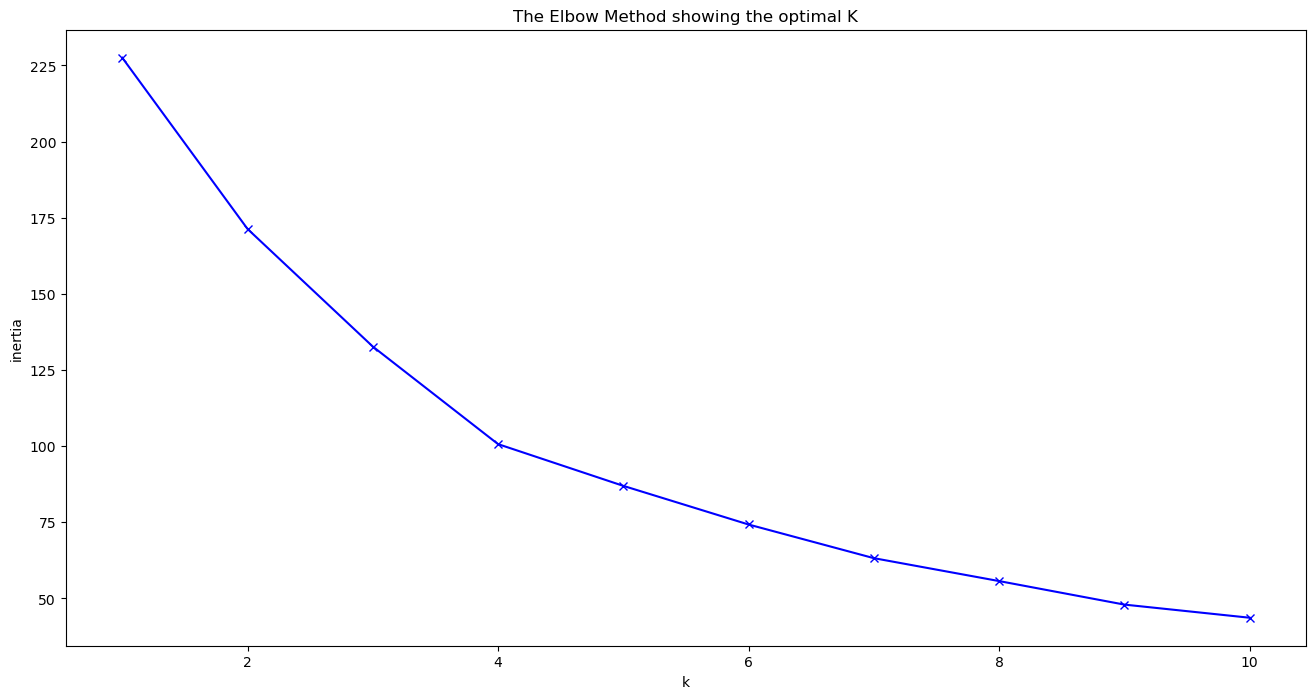

In [8]:
#elbow method
inertias = []
K = range(1,11) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)
    
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

## Silhouette method

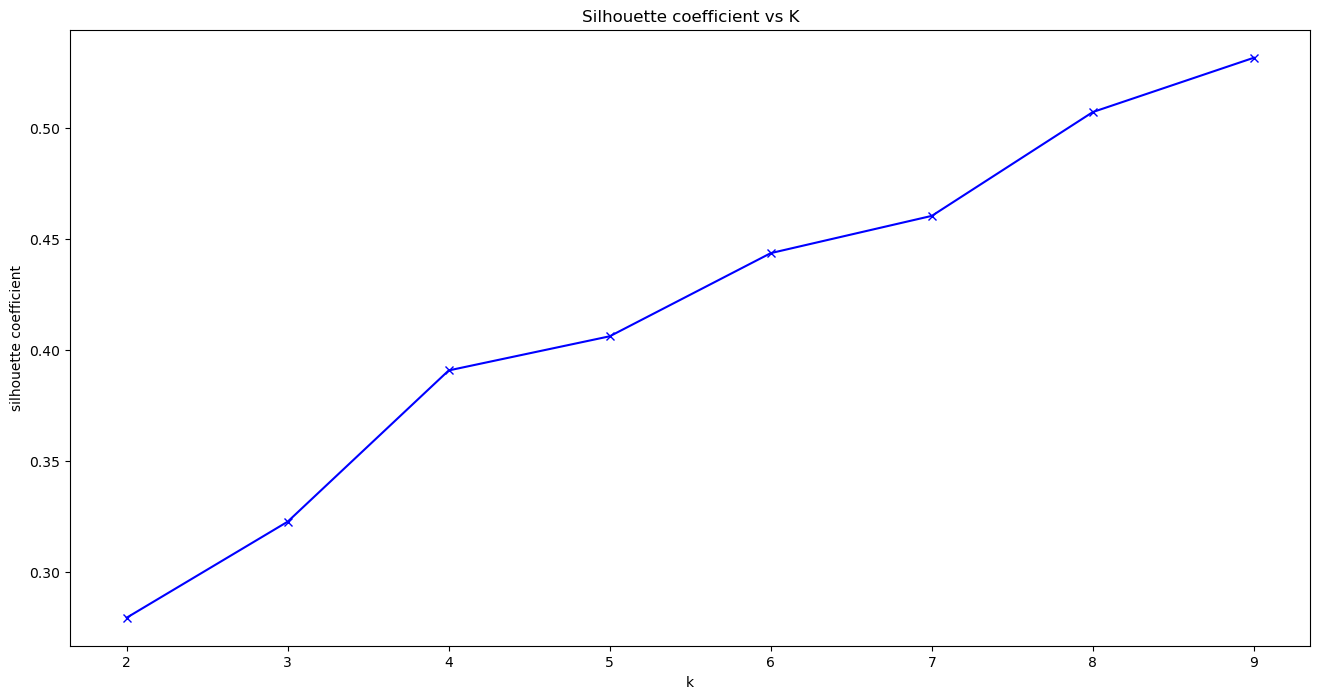

In [9]:
from sklearn.metrics import silhouette_score
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    label=kmeanModel.predict(X)
    silhouettes.append(silhouette_score(X,label))
    
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [15]:
model = KMeans(4) #instatiating
model.fit(X)
y_pred = model.predict(X)


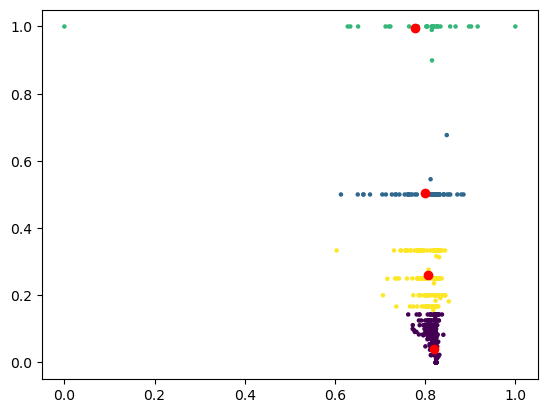

In [16]:
plt.scatter(X[:,0], X[:,1], c=y_pred, s=5) #have color (c) represent the predictions (y_pred)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red')

## Visualize with Radial plot

In [17]:
labels = model.labels_
df['Cluster'] = labels

In [21]:
cluster_groups = df.groupby('Cluster').agg('mean')
cluster_groups.reset_index()

,Cluster,creditSpendtoLimitRatio,averageMonthlySpending,numTnxMonthlyAverage,hasSavings,hasCredit,hasChecking,incomeToSavingsRanking
0,0,0.507484,0.820368,0.040561,0.780761,0.774049,0.746085,0.453579
1,1,0.501770,0.800549,0.502963,0.780000,0.873333,1.000000,0.496667
2,2,0.492168,0.777330,0.996416,0.774194,0.838710,1.000000,0.548387
3,3,0.500012,0.805736,0.261614,0.783505,0.847938,1.000000,0.538660


In [22]:
categories = cluster_groups.columns.tolist()

In [23]:
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=cluster_groups.iloc[0].tolist(),
      theta=categories,
      name='Cluster 0'
))

fig.add_trace(go.Scatterpolar(
      r=cluster_groups.iloc[1].tolist(),
      theta=categories,
      
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=cluster_groups.iloc[2].tolist(),
      theta=categories,
      
      name='Cluster 2'
))
fig.add_trace(go.Scatterpolar(
      r=cluster_groups.iloc[3].tolist(),
      theta=categories,
      
      name='Cluster 3'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-1,2]
    )),
  showlegend=False
)

fig.show()

In [28]:
df.columns

Index(['creditSpendtoLimitRatio', 'averageMonthlySpending',
       'numTnxMonthlyAverage', 'hasSavings', 'hasCredit', 'hasChecking',
       'incomeToSavingsRanking', 'Cluster'],
      dtype='object')

# PCA for visualization

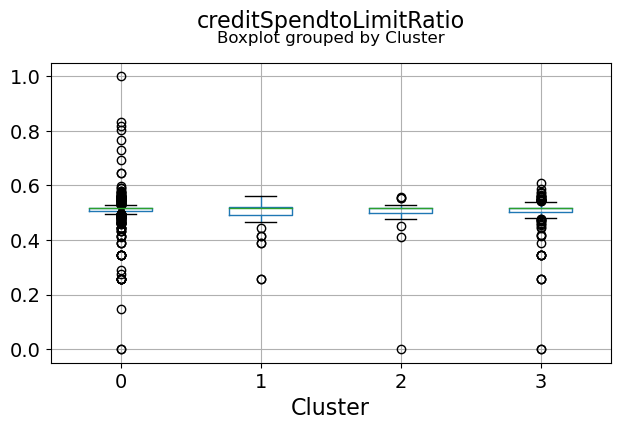

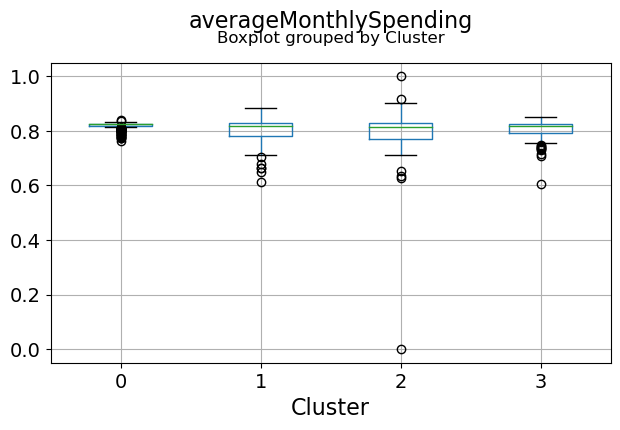

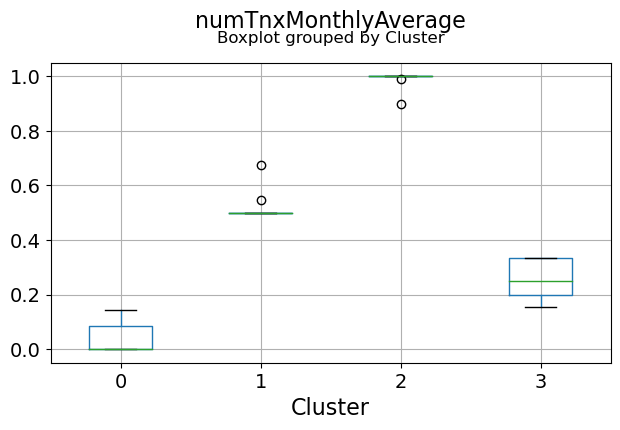

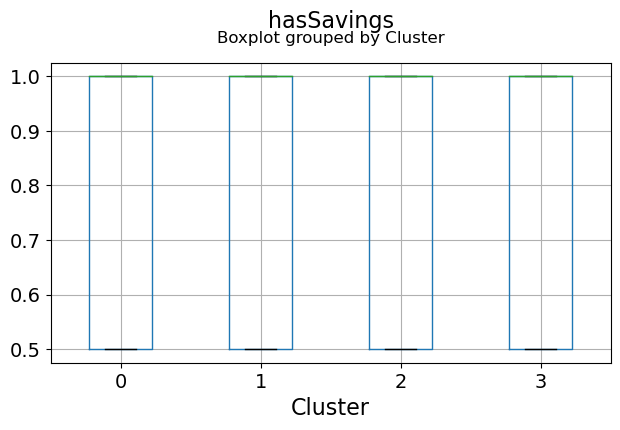

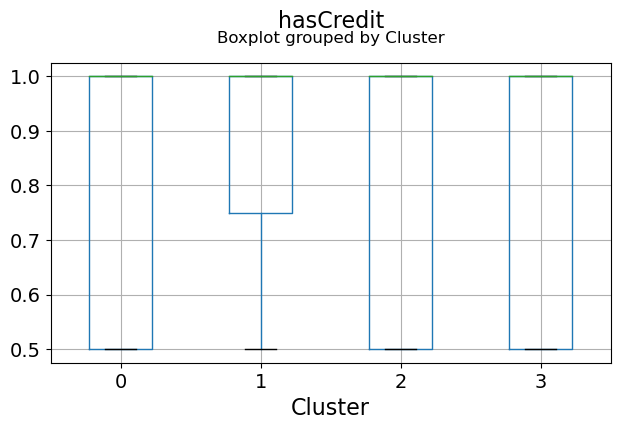

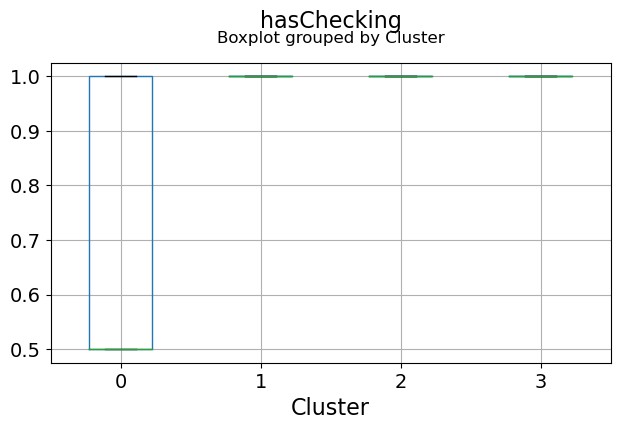

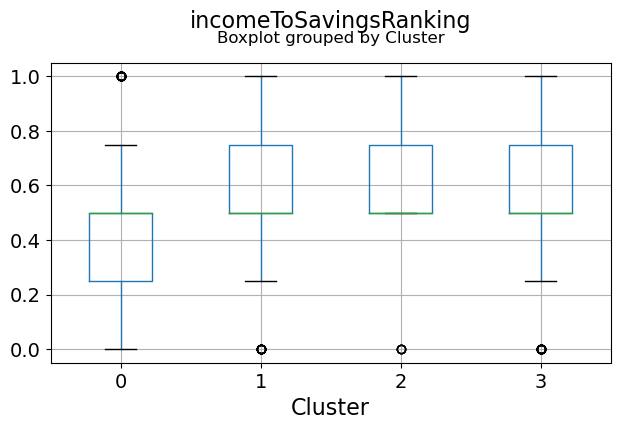

In [27]:
for c in df.columns[:-1]:
    df.boxplot(c,by='Cluster',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel('Cluster', fontsize=16)

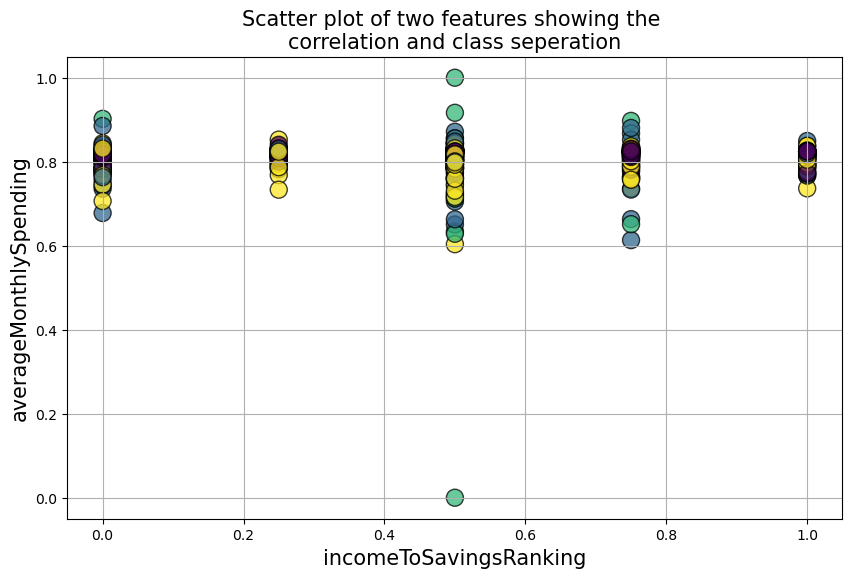

In [29]:
scale_mapper = {"0":1, "1":2, "2":3 , "3":4 }
df["Scale"] = df['Cluster'].replace(scale_mapper)


plt.figure(figsize=(10,6))
plt.scatter(df['incomeToSavingsRanking'],df['averageMonthlySpending'],c=df['Scale'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel('incomeToSavingsRanking',fontsize=15)
plt.ylabel('averageMonthlySpending',fontsize=15)
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop(['Cluster','Scale'],axis=1)
y = df['Scale']
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=df.columns[:-2])
dfx.head(10)

,creditSpendtoLimitRatio,averageMonthlySpending,numTnxMonthlyAverage,hasSavings,hasCredit,hasChecking,incomeToSavingsRanking
0,0.159903,0.279994,-0.791576,-1.133315,-1.255333,-1.513522,0.060853
1,-0.567726,0.149269,-0.603335,0.882367,0.796601,0.660711,1.007874
2,0.384996,0.279994,-0.791576,0.882367,0.796601,-1.513522,-0.886169
3,1.941738,0.234108,-0.454915,0.882367,0.796601,0.660711,-0.886169
4,0.776717,-0.338376,-0.361519,0.882367,0.796601,0.660711,-0.886169
5,0.159903,0.279994,-0.791576,-1.133315,-1.255333,-1.513522,0.060853
6,-0.457881,-0.686303,0.641946,0.882367,0.796601,0.660711,0.060853
7,-0.012714,-0.686182,0.641946,0.882367,0.796601,0.660711,0.060853
8,0.159903,0.279994,-0.791576,-1.133315,0.796601,-1.513522,0.060853
9,0.419346,0.242010,0.283565,0.882367,0.796601,0.660711,1.954896


In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(dfx)


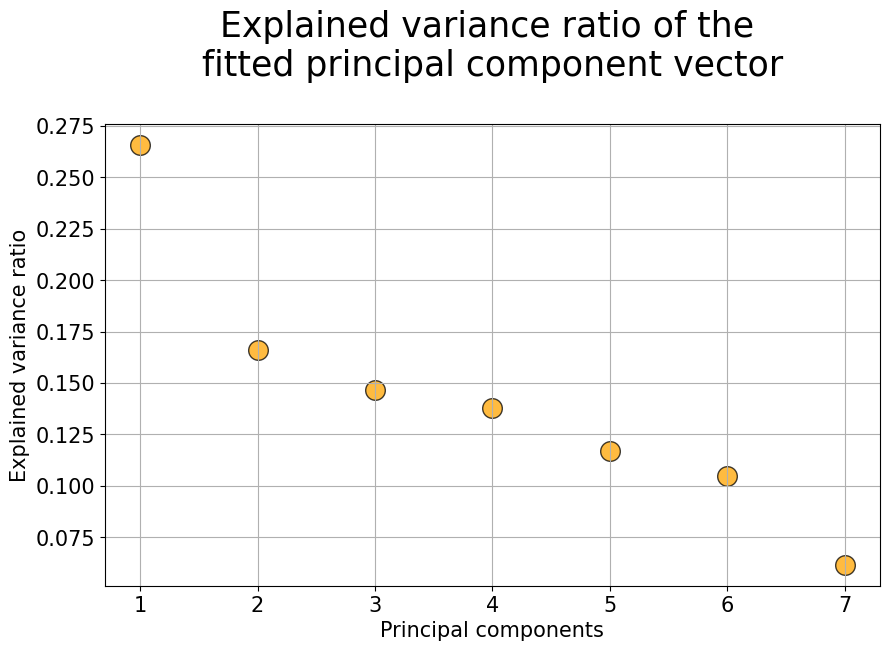

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

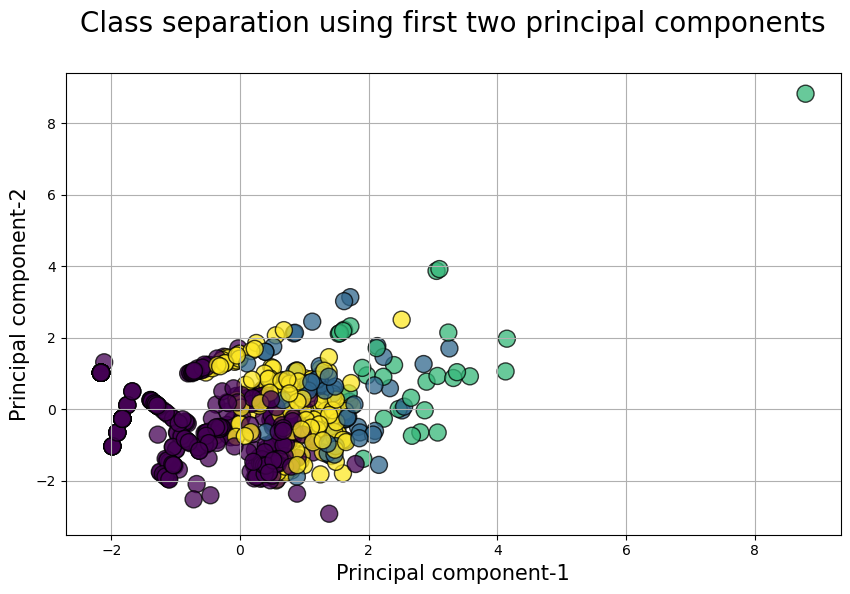

In [39]:
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Scale'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()